In [ ]:
# import numpy as np
import pandas as pd
from unc_tools import UncRegression
from IPython.display import display
import matplotlib.pyplot as plt

V = 0.6
V0 = 100
ro = 0.899
M = 12 * 4 + 8 + 16 * 2

a = V * ro / (M * (V+V0))
b = 5e-3
a = 0.061

def func(x):
    return 1 / (b-a) * np.log((b-x)/(a-x))

TypeError: loop of ufunc does not support argument 0 of type AffineScalarFunc which has no callable log method

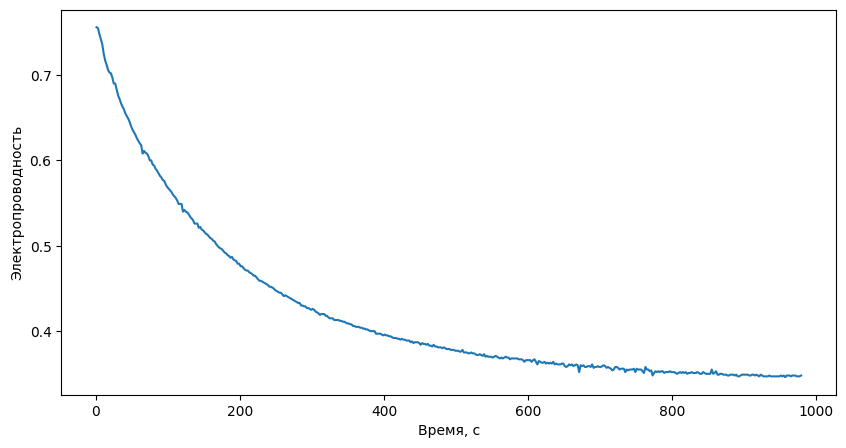

In [18]:
for i in range(1,2):

    with open(f"data/T{i}.txt", "r") as f:

        df_exp = pd.read_csv(f"data/T{i}.txt", 
                             sep="\t", 
                             dtype = np.float32, 
                             decimal = ",", 
                             names = ["time", "temp"])

slices = [slice(0,250), slice(0,100), slice(0,50)]

k = []

for j in range(1,4):
    
    with open(f"data/exp{j}.txt", "r") as f:

        df_exp = pd.read_csv(f"data/exp{j}.txt", sep="\t", dtype = np.float32, decimal = ",", names = ["time", "kappa"])
        df_exp.to_csv(f"export/default_data{j}.csv")
        
        kappa0 = df_exp.kappa.iloc[0]
        kappainf = df_exp.kappa.iloc[-1]
        df_exp["x"] = b * (df_exp.kappa - kappa0) / (kappainf - kappa0)

        fig, ax = plt.subplots(figsize = (10,5))
        ax.set_xlabel("Время, с")
        ax.set_ylabel("Электропроводность")
        ax.plot(df_exp.time, df_exp.kappa)
        fig.savefig(f"export/time-kappa{j}.png")
        
        df_exp["y"] = func(df_exp.x)
        df_exp.replace([np.inf, -np.inf], np.nan).dropna()
        df_exp.to_csv(f"export/default_data{j}.csv")
        fig, ax = plt.subplots(figsize = (10,5))
        ax.set_xlabel("Время, с")
        #ax.set_ylabel("")
        ax.plot(df_exp.time, df_exp.y)
        
        
        sl = slices[j-1]
        df_exp = df_exp.iloc[sl]
        reg = UncRegression(df_exp.time, df_exp.y)
        reg.plot(ax=ax)
        fig.savefig(f"export/fitted{j}.png")
        reg.to_csv(f"export/fitted_data{j}.csv")
        k.append(reg.coefs[0])

        
        

        

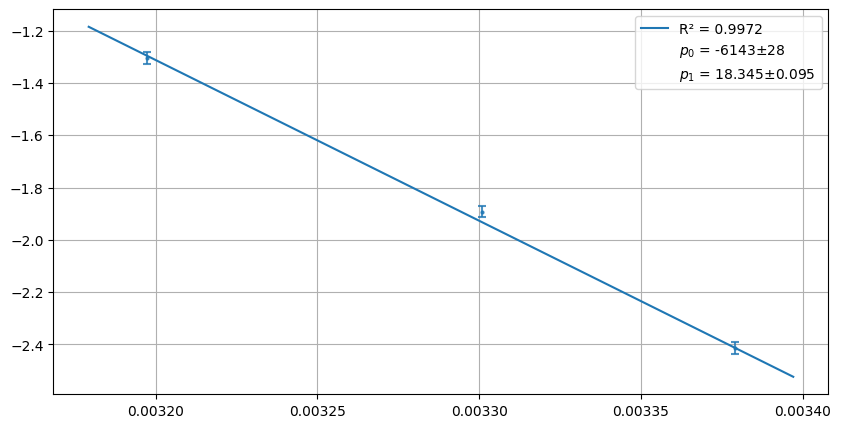

In [15]:
import uncertainties.unumpy as unp
import uncertainties as unc

df = {"k": k,
      "temp": [295.95, 302.95, 312.75]}

df = pd.DataFrame(df)

reg = UncRegression(1/df.temp, unp.log(df.k))

fig, ax = plt.subplots(figsize=(10,5))

reg.plot(ax = ax)

fig.savefig("export/final.png")

a, b = reg.coefs

reg.to_csv("export/final.csv")